In [6]:
import nb_utils

In [3]:
from lightning_data_modules import HaarDecomposedDataset, ImageDatasets, PairedDataset, SyntheticDataset, SyntheticPairedDataset, Synthetic1DConditionalDataset, SyntheticTimeSeries, SRDataset, SRFLOWDataset, KSphereDataset, MammothDataset, LineDataset, GanDataset #needed for datamodule registration

In [8]:
from lightning_data_modules.utils import create_lightning_datamodule
from configs.utils import read_config
config = read_config('configs/fixedsquaresmanifold/10_3_5.py')
DataModule = create_lightning_datamodule(config)
DataModule.setup()
train_dataloader = DataModule.train_dataloader()

ModuleNotFoundError: No module named 'configs.fixedsquaresmanifold'

In [4]:
x = next(iter(train_dataloader))

In [12]:
import os
import run_lib
from dim_reduction import get_manifold_dimension
config = read_config('logs/ksphere/n_1/dim_10/random_isometry/non_uniform_0.25/config.pkl')
config.model.checkpoint_path = 'logs/ksphere/n_1/dim_10/random_isometry/non_uniform_0.5/checkpoints/best/test.ckpt'
svd = get_manifold_dimension(config = config, name='svd', return_svd=True)

RuntimeError: No CUDA GPUs are available

In [6]:
from plot_utils import plot_spectrum, plot_distribution
fig = plot_spectrum(svd, mode='all', title='Score Spectrum for a Spaghetti Line')

torch.Size([128, 3, 64, 64])

In [10]:
import torch
import os
import pickle 

latent_dim=10
data_path = '/rds/user/js2164/hpc-work/data/gan_data'
for i in range(10):
    with open(os.path.join(data_path, f'latent_dim_{latent_dim}_part_{i}.pkl'), 'rb') as f:
        X = torch.cat([X, pickle.load(f)])
    

In [11]:
X.shape

torch.Size([110000, 3, 64, 64])

In [22]:
X.element_size() * X.nelement() / 1024 / 1024 /1024

5.035400390625

In [1]:
import nb_utils
import glob

Moving cwd to /rds/user/js2164/hpc-work/repos/score_sde_pytorch


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the example flights dataset and convert it to a long-form dataframe
flights = sns.load_dataset("flights")
flights_long = flights.pivot("month", "year", "passengers")
flights_long = flights_long.reset_index().melt(id_vars='month', var_name='year', value_name='passengers')

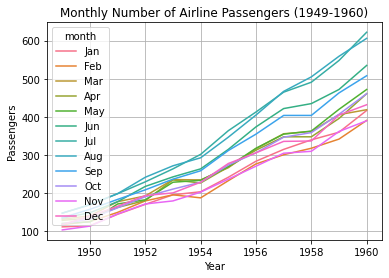

In [5]:
# Create the line plot
sns.lineplot(data=flights_long, x='year', y='passengers', hue='month')

# Customize the plot (optional)
plt.title("Monthly Number of Airline Passengers (1949-1960)")
plt.xlabel("Year")
plt.ylabel("Passengers")

plt.grid(True)
# Show the plot
plt.show()


In [4]:
flights_long

,month,year,passengers
0,Jan,1949,112
1,Feb,1949,118
2,Mar,1949,132
3,Apr,1949,129
4,May,1949,121
...,...,...,...
139,Aug,1960,606
140,Sep,1960,508
141,Oct,1960,461
142,Nov,1960,390
